<b><u><font size="6"> PartA:Model Code</b></u>

4. Load the wine quality dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("winequality-white.csv",";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


5.Euclidean distance of two vectors

In [2]:
def euclidean(a,b):
    return np.linalg.norm(a-b)

6. Manhattan distance of two vectors

In [3]:
def manhattan(a,b):
    return np.sum(np.abs(a - b), axis=0)

7. write a function to calculate and return the accuracy and generalization error of two vectors

In [4]:
def acc_error(y_target,y_pred):
    acc=np.mean(np.sum(np.equal(y_target,y_pred)))/np.shape(y_target)
    error=1-acc
    return acc,error

8. write three functions to compute: precision, recall and F1 score

In [5]:
# The precision is the ratio tp / (tp + fp)
def precision_score(y_train,y_train_pred):
    tp=np.sum((y_train==1)&(y_train_pred==1))
    fp=np.sum((y_train==0)&(y_train_pred==1))
    return tp/np.double((tp+fp))

# The recall is the ratio tp / (tp + fn)
def recall_score(y_train,y_train_pred):
    tp=np.sum((y_train==1)&(y_train_pred==1))
    
    fn=np.sum((y_train==1)&(y_train_pred==0))
    
    return tp/np.double((tp+fn))

# F1 = 2 * (precision * recall) / (precision + recall)
def f1_score(y_train,y_train_pred):
    precision=precision_score(y_train,y_train_pred)
    recall=recall_score(y_train,y_train_pred)
    return 2 * (precision * recall) / np.double((precision + recall))
    
    

9. write a function to compute the confusion matrix of two vectors

In [6]:
def confusion_matrix(y_train,y_train_pred):
    tp=np.sum((y_train==1)&(y_train_pred==1))
    fp=np.sum((y_train==0)&(y_train_pred==1))
    fn=np.sum((y_train==1)&(y_train_pred==0))
    tn=np.sum((y_train==0)&(y_train_pred==0))
    return np.array([[tp,fp],[fn,tn]])

10.write a function to genenerate receiver operating characteristic (ROC)curve

In [7]:
def roc_curve(y_train,y_scores):
    thresholds = np.linspace(1,0,101)
    tpr=np.empty([101,])
    fpr=np.empty([101,])
    for counter, i in enumerate(thresholds):
        tpr[counter]=np.sum((y_train==1)&(y_scores>=i))/(np.sum(y_train==1))
        fpr[counter]=np.sum((y_train==0)&(y_scores>=i))/(np.sum(y_train==0))
    return fpr, tpr, thresholds


In [8]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

        

<Figure size 720x432 with 0 Axes>

11. write a function to compute area under curve (AUC) for the ROC curve

In [9]:
def AUC(fpr,tpr):
    AUC = 0
    for i in range(1,101):
        AUC += (fpr[i]-fpr[i-1]) * (tpr[i]+tpr[i-1])/2
    return AUC

12. Write a function to genearte the precision-recall curve

In [10]:
def precision_recall_curve(y_train, y_scores):
    thresholds = np.linspace(1,0,100)
    precisions=np.empty([101,])
    recalls=np.empty([101,])
    for counter, i in enumerate(thresholds):
        tp=np.sum((y_train==1)&(y_scores>=i))
        fp=np.sum((y_train==0)&(y_scores>=i))
        fn=np.sum((y_train==1)&(y_scores<i))
        precisions[counter]=tp/(tp+fp)
        recalls[counter]=tp/(tp+fn)
    
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])
    plt.show()
    
    return precisions, recalls, thresholds
        
    

    


13. Write a KNN model class

In [11]:
from collections import Counter
class KNeighborsClassifier():
    
        
    def fit(self,training_features,training_labels,k,distance_f,weight):
        self.training_features=training_features
        self.training_labels=training_labels
        self.k=k
        self.distance_f=distance_f
        self.weight=weight
    
    def predict(self,test_features):
        d=np.empty(self.training_features.shape[0])
        labels=np.empty(test_features.shape[0])
        self.test_features=test_features
        if (self.distance_f=="euclidean"):
            for i in range(self.test_features.shape[0]):
                for j in range(self.training_features.shape[0]):
                    
                    d[j]=euclidean(self.test_features[i,:],self.training_features[j,:])
                
                
                index=(d).argsort()[:1+self.k]
                              
                temp_labels=self.training_labels[(index)]
                
                if self.weight=="uniform":
                    unique, counts = np.unique(temp_labels, return_counts=True)
                    labels[i]=unique[np.argmax(counts)]
                if self.weight=="distance":
                    record=np.zeros(2)
                    for _,element in enumerate(index):
                        record[self.training_labels[element]]+=np.double((1/d[element]))
                    labels[i]=np.argmax(record)
                
                
            
            
              
        if (self.distance_f=="manhattan"):
            for i in range(self.test_features.shape[0]):
                for j in range(self.training_features.shape[0]):
                    
                    d[j]=manhattan(self.test_features[i,:],self.training_features[j,:])
                
                
                index=(d).argsort()[:1+self.k]
                            
                temp_labels=self.training_labels[(index)]
                
                if self.weight=="uniform":
                    unique, counts = np.unique(temp_labels, return_counts=True)
                    labels[i]=unique[np.argmax(counts)]
                if self.weight=="distance":
                    record=np.zeros(2)
                    for _,element in enumerate(index):
                        record[self.training_labels[element]]+=(1/d[element])
                    labels[i]=np.argmax(record)
                        
                    
                
            
            
            
            
        return labels
            
        

<u><b><font size="6">Part B: Data Processing(478: 20 pts& 878: 25 pts)</u></b></font>

14.Read in the ‘winequality-white.csv’ file as a pandas data frame.

15.Thetarget will be the ‘quality’ columnwhich represents rating of wine and ranges from 3 to 8.

In [12]:


import pandas as pd
df = pd.read_csv('winequality-white.csv',';')
#df = pd.read_csv('C:/Users/yayu/Box/cs/ML/assignment/PA1/winequality-white.csv',';')
y = (df["quality"] >5).astype(np.int)  # 1 if Iris-Virginica, else 0
X=df.iloc[:,0:11]




16.Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles(3 pts).

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


17.Shuffle the rows of your data –we don’t want the order the data is imported in to affect our findings(2pts).

In [14]:
df = df.sample(frac=1)

18.Generate pair plots using the seaborn package (see first recitation notebook). You need to identify and report the redundant features (3pts).

d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is dep

d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwarg

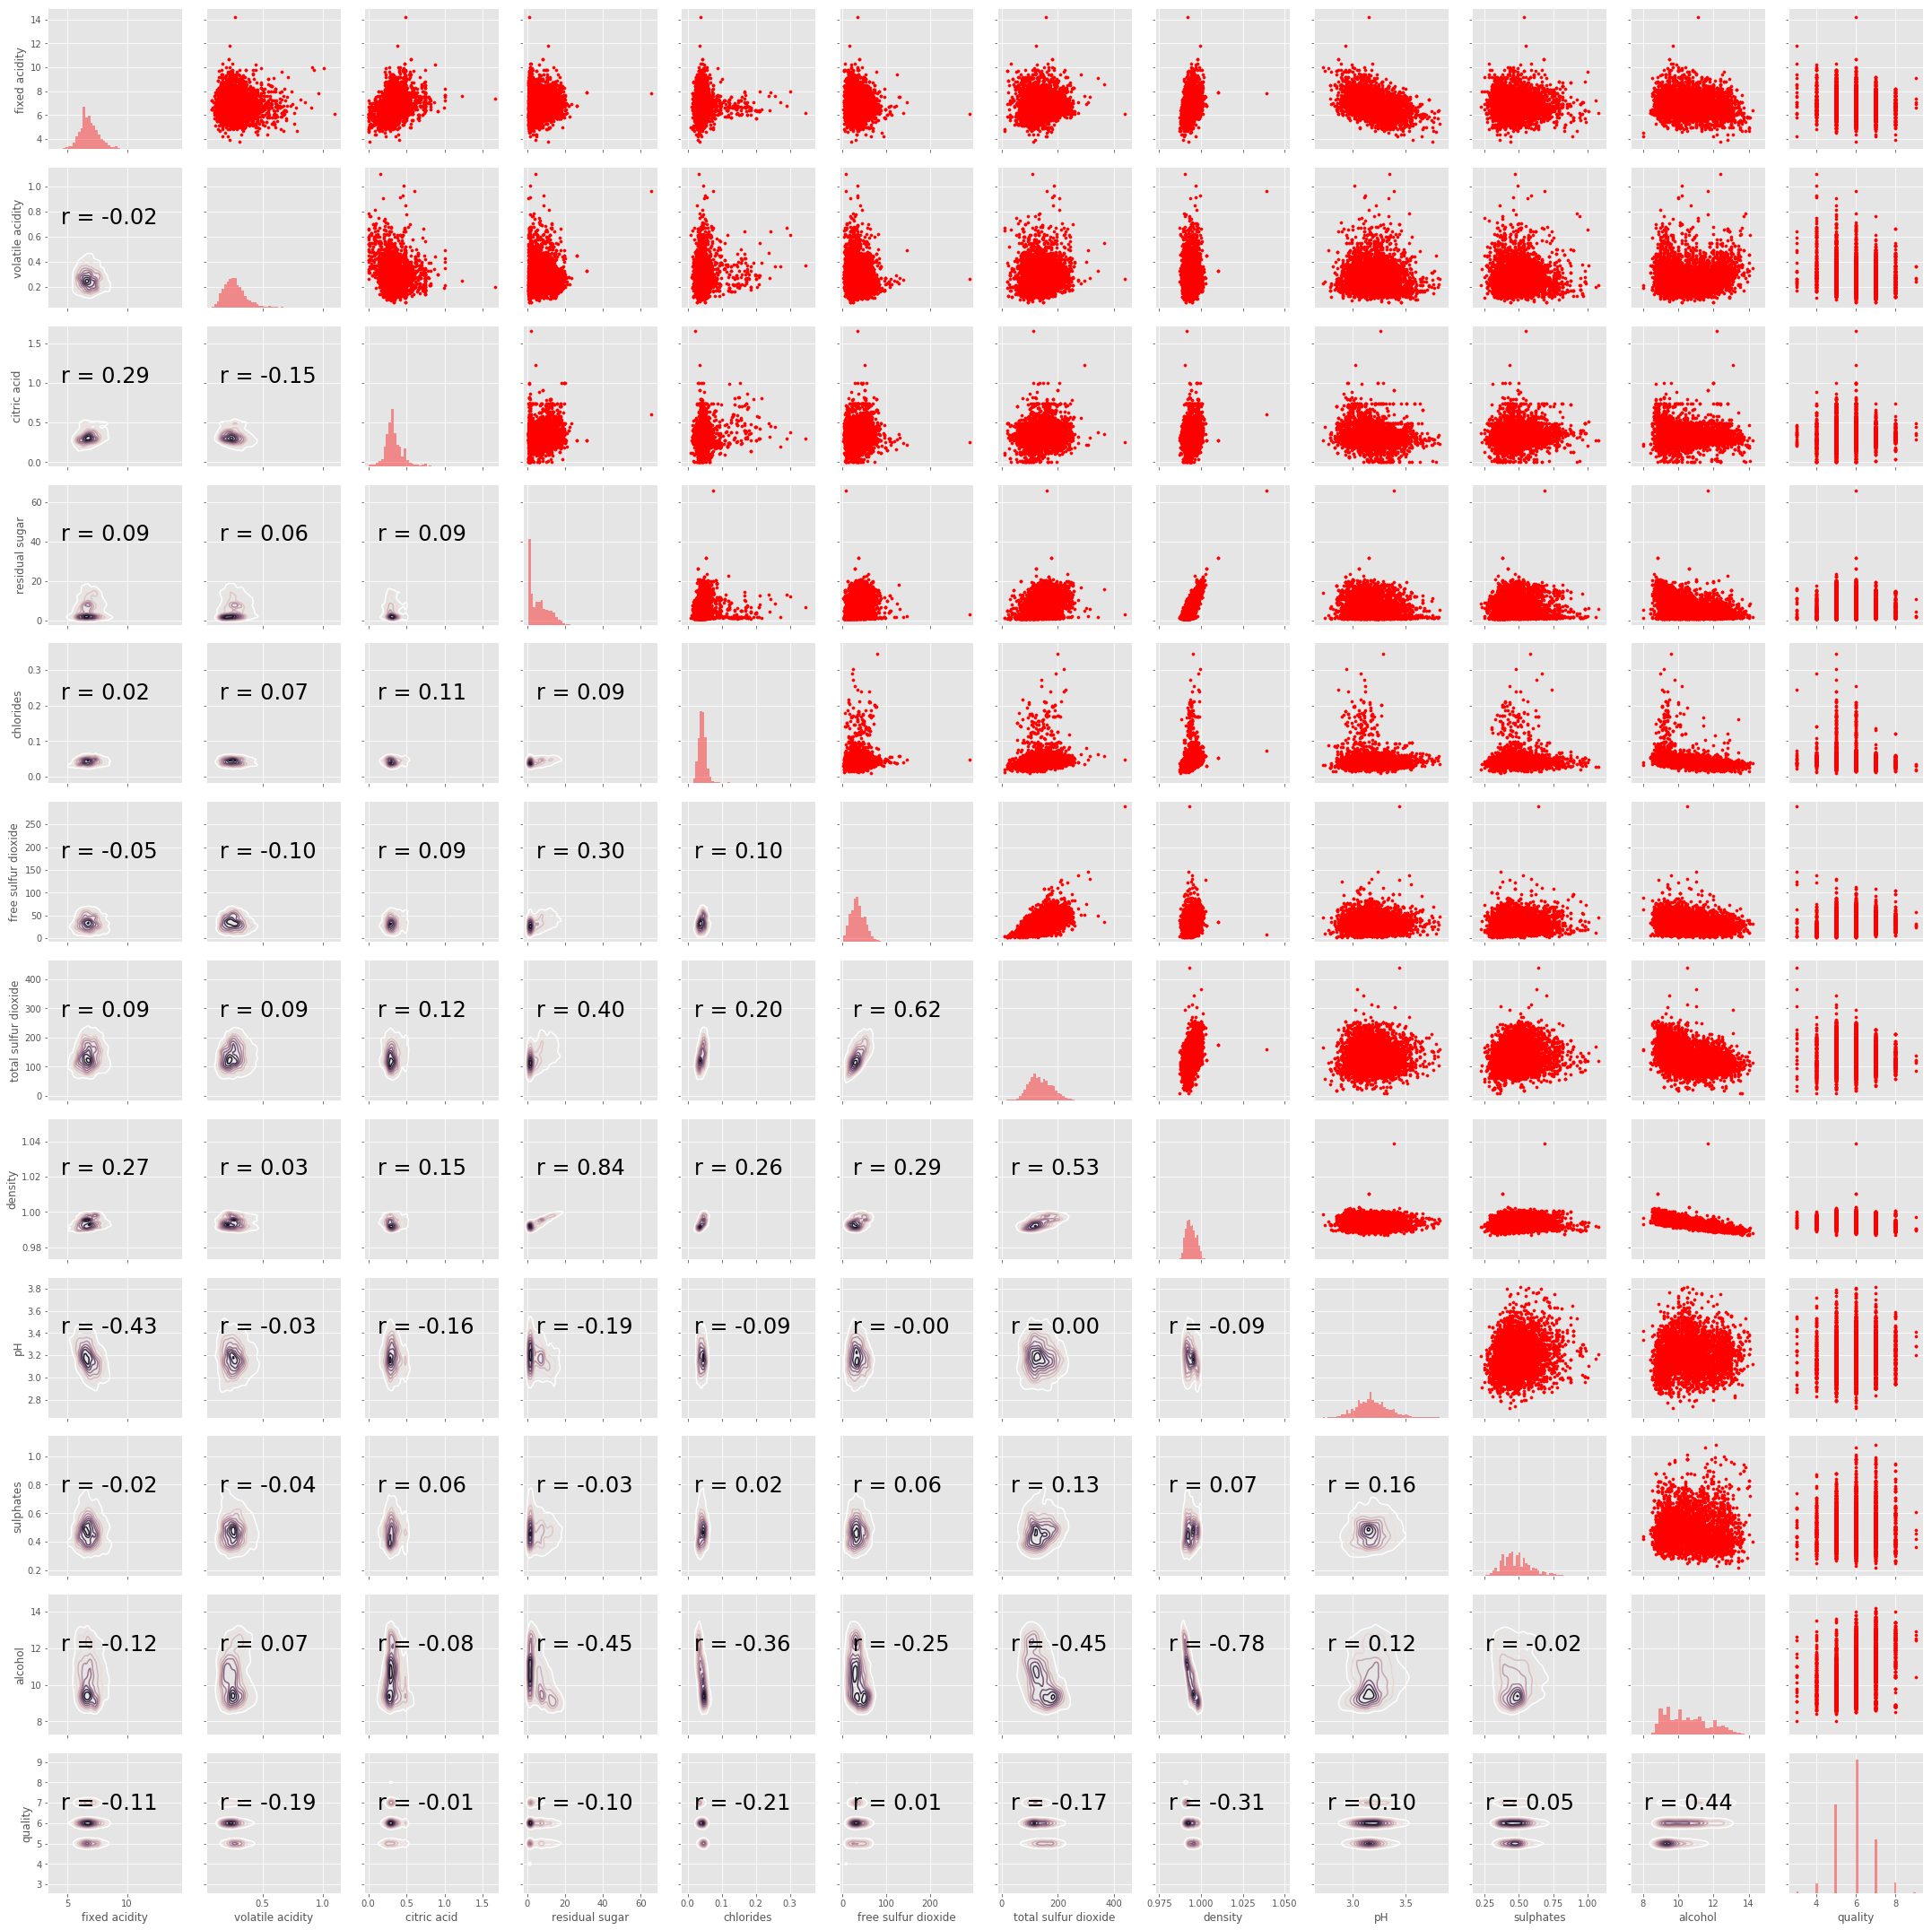

In [15]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

The redundant features are "residual sugar","density"

19.Drop the redundant features (1pts).

In [16]:
X = X.drop(columns=["residual sugar","density"])

20.Write a functionnamed“partition” to split your data into train and test set. 

In [17]:
import numpy as np
def train_test_split (feature_matrix, target_vector, t):
    m = np.size(feature_matrix,0)  # m=feature_matrix.shape[0]
    train_feature_matrix =np.array( feature_matrix[0:np.int((1-t)*m),:])
    test_feature_matrix = np.array(feature_matrix[np.int((1-t)*m):m,:])
    train_target_vector = np.array(target_vector[0:np.int((1-t)*m)])
    test_target_vector = np.array(target_vector[np.int((1-t)*m):m])
    return train_feature_matrix,test_feature_matrix,train_target_vector,test_target_vector

In [18]:
import numpy 
X=numpy.array(X)
y=numpy.array(y)

In [19]:
X_train_ori,X_test_ori,y_train,y_test=train_test_split (X, y, 0.2)
#print(train_feature_matrix.shape)
#print(test_feature_matrix.shape)
#print(train_target_vector.shape)
#print(test_target_vector.shape)

21.Naively run your kNN model on the train dataset with k = 5 and using Euclidean distance(6 pts).

In [20]:
#21
knn=KNeighborsClassifier()
knn.fit(X_train_ori,y_train,5,"euclidean","uniform")
y_pred=knn.predict(X_test_ori)

In [21]:
#a
print ("f1_score of unscaled data:" ,f1_score(y_test,y_pred))
print ("accuracy and error of scaled data:", acc_error(y_test,y_pred))


f1_score of unscaled data: 0.7904624277456648
accuracy and error of scaled data: (array([0.70408163]), array([0.29591837]))


In [22]:
#b
def scaledata (X_train):
    n = np.size(X_train,1)
    for i in range(0,n):
        mean = np.mean(X_train[:,i])
        stand = np.std(X_train[:,i])
        X_train[:,i] = (X_train[:,i]-mean)/stand
    return X_train

In [23]:
#c
X_train = scaledata (X_train_ori)
X_test = scaledata (X_test_ori)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train,5,"euclidean","uniform")
y_pred=knn.predict(X_test)
print (" f1_score of scaled data:" ,f1_score(y_test,y_pred))
print (" accuracy and error of scaled data:", acc_error(y_test,y_pred))

 f1_score of scaled data: 0.8208955223880596
 accuracy and error of scaled data: (array([0.75510204]), array([0.24489796]))


#d Based on the result from step a and c, we should use satndarized data.

In [24]:
#e
knn=KNeighborsClassifier()
knn.fit(X_train,y_train,5,"euclidean","uniform")
y_pred=knn.predict(X_test)
print (" f1_score of scaled data(uniform distance):" ,f1_score(y_test,y_pred))
print (" accuracy and error of scald data(uniform distance):", acc_error(y_test,y_pred))


knn=KNeighborsClassifier()
knn.fit(X_train,y_train,5,"euclidean","distance")
y_pred=knn.predict(X_test)
print (" f1_score of scaled data(inverse distance weighting):" ,f1_score(y_test,y_pred))
print (" accuracy and error of scald data(inverse distance weighting):", acc_error(y_test,y_pred))

 f1_score of scaled data(uniform distance): 0.8208955223880596
 accuracy and error of scald data(uniform distance): (array([0.75510204]), array([0.24489796]))
 f1_score of scaled data(inverse distance weighting): 0.8262108262108262
 accuracy and error of scald data(inverse distance weighting): (array([0.75102041]), array([0.24897959]))


#e from result above inverse distance weighting work better.

<b><u><font size="6"> Part C: Model Evaluation(478 & 878: 30pts)</b></u>

22.Write the S-fold (aka k-Fold) cross-validation function(10 pts).

In [25]:

def partition(data,folds):
    num_samples=data.shape[0]
    samples_per_fold=np.int(num_samples/folds)
    index=np.arange(0,num_samples)
    index_test=np.empty([folds,samples_per_fold],dtype=int)
    index_train=np.empty([folds,num_samples-samples_per_fold])
    for i in range(folds):
        index_test[i,:]=np.arange(i*samples_per_fold,(i+1)*samples_per_fold)
        index_train[i,:]=np.setdiff1d(index,index_test[i,:])
    return index_train,index_test

In [26]:
#def sFold(folds,data,labels,model,model_arg,error_function):

def sFold(folds,data,labels,model,model_arg,error_function):
    num_samples=data.shape[0]
    num_features=data.shape[1]
    index_train,index_test=partition(data,folds)
    k=model_arg["k"]
    distance_f=model_arg["distance_f"]
    weight=model_arg["weight"] 
    model=model
    score=np.zeros(folds)
    valid_y_record=np.empty((folds,np.int(num_samples/folds)),dtype=int)
    y_pred_record=np.empty((folds,np.int(num_samples/folds)),dtype=int)
    
    for i in range(folds):
        
        train_X=data[index_train[i,:].astype(int)]
        train_y=labels[index_train[i,:].astype(int)]
        valid_X=data[index_test[i,:].astype(int)]
        valid_y=labels[index_test[i,:].astype(int)]
        
        
        
        model.fit(train_X,train_y,k,distance_f,weight)
        y_pred=model.predict(valid_X)
        
        valid_y_record[i,:]=valid_y
        y_pred_record[i,:]=y_pred
       
        if error_function=="f1":
            score[i]=f1_score(y_pred,valid_y)
        #print(recall_score(y_pred,valid_y))
        #print(precision_score(y_pred,valid_y))
        #print(y_pred)
       # print(valid_y)
    dict={"expect labels":valid_y_record,"predicted labels":y_pred_record,"average error":np.mean(score)}
    
        
    return dict

In [27]:
dict=sFold(5,X_train,y_train,KNeighborsClassifier(),{"k":1,"distance_f":"euclidean","weight":"uniform"},"f1")

In [28]:
dict

{'expect labels': array([[1, 1, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1]]),
 'predicted labels': array([[1, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 1, 0, 1],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1]]),
 'average error': 0.6928391825690565}

In [29]:
def gridsearch(X,y,param1_list,param2_list):
    #X,y=generatedata()
    results = np.empty((len(param1_list),len(param2_list)))
    max_f1=0

    for param1_idx in range(len(param1_list)):
        for param2_idx in range(len(param2_list)):
            param1 = param1_list[param1_idx]
            param2 = param2_list[param2_idx]
            
            temp_dict=sFold(5,X,y,KNeighborsClassifier(),{"k":param1,"distance_f":param2,"weight":"distance"},"f1")
            temp_f1=temp_dict["average error"]
            if temp_f1>max_f1:
                max_f1=temp_f1
                best_k=param1
                best_d=param2
            results[param1_idx, param2_idx]=temp_f1
            
   
    return best_k,best_d,results

23.Use your S-fold function to evaluatethe performance of your model over each combination of k and distance metrics from the following sets: (5pts)

In [30]:
best_k,best_d,results=gridsearch(X_train,y_train,[1, 5, 9, 11],["euclidean","manhattan"])

d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [31]:
table_data = np.zeros((8,5))
k_test_list = [1,5,9,11]
weight_test_list = ["euclidean","manhattan"]
q=0
for kidx in range(len(k_test_list)):
    for widx in range(len(weight_test_list)):
        param1 = k_test_list[kidx]
        param2 = weight_test_list[widx]

        temp_dict=sFold(5,X,y,KNeighborsClassifier(),{"k":param1,"distance_f":param2,"weight":"uniform"},"f1")
        table_data[q,0] =precision_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data[q,1] =recall_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data[q,2] =f1_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data[q,3] =np.mean(np.sum(np.equal(temp_dict["expect labels"],temp_dict["predicted labels"])))/np.size(temp_dict["expect labels"])
        table_data[q,4] = 1- table_data[q,3]
        q=q+1

In [32]:
table_data

array([[0.76040404, 0.5781874 , 0.65689354, 0.59836568, 0.40163432],
       [0.76750814, 0.57910906, 0.66012957, 0.60347293, 0.39652707],
       [0.73785458, 0.6952381 , 0.71591269, 0.63309499, 0.36690501],
       [0.74828151, 0.70230415, 0.72456418, 0.64494382, 0.35505618],
       [0.730908  , 0.746851  , 0.7387935 , 0.64882533, 0.35117467],
       [0.74468731, 0.75360983, 0.749122  , 0.66435138, 0.33564862],
       [0.72427013, 0.75453149, 0.73909118, 0.64576098, 0.35423902],
       [0.73840168, 0.75791091, 0.74802911, 0.66046987, 0.33953013]])

In [33]:
import numpy as np
from pandas import Series, DataFrame
pd.DataFrame(table_data,index=['k:1/euclidean', 'k:1/manhattan', 'k:5/euclidean', 'k:5/mahattan', 'k:9/euclidean','k:9/manhattan',  'k:11/euclidean','k:11/manhattan'],columns=['precision','recall','f1_score', 'confusion_matrix', 'accuracy'])

,precision,recall,f1_score,confusion_matrix,accuracy
k:1/euclidean,0.760404,0.578187,0.656894,0.598366,0.401634
k:1/manhattan,0.767508,0.579109,0.660130,0.603473,0.396527
k:5/euclidean,0.737855,0.695238,0.715913,0.633095,0.366905
k:5/mahattan,0.748282,0.702304,0.724564,0.644944,0.355056
k:9/euclidean,0.730908,0.746851,0.738793,0.648825,0.351175
k:9/manhattan,0.744687,0.753610,0.749122,0.664351,0.335649
k:11/euclidean,0.724270,0.754531,0.739091,0.645761,0.354239
k:11/manhattan,0.738402,0.757911,0.748029,0.660470,0.339530


In [34]:
table_data2 = np.zeros((8,5))
k_test_list = [1,5,9,11]
weight_test_list = ["euclidean","manhattan"]
q=0
for kidx in range(len(k_test_list)):
    for widx in range(len(weight_test_list)):
        param1 = k_test_list[kidx]
        param2 = weight_test_list[widx]

        temp_dict=sFold(5,X,y,KNeighborsClassifier(),{"k":param1,"distance_f":param2,"weight":"distance"},"f1")
        table_data2[q,0] =precision_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data2[q,1] =recall_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data2[q,2] =f1_score(temp_dict["expect labels"],temp_dict["predicted labels"])
        table_data2[q,3] =np.mean(np.sum(np.equal(temp_dict["expect labels"],temp_dict["predicted labels"])))/np.size(temp_dict["expect labels"])
        table_data2[q,4] = 1- table_data[q,3]
        q=q+1

d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [35]:
table_data2

array([[0.73220974, 0.72073733, 0.72642824, 0.63901941, 0.40163432],
       [0.73863636, 0.71889401, 0.72863148, 0.64392237, 0.39652707],
       [0.72196532, 0.76743472, 0.74400596, 0.64882533, 0.36690501],
       [0.73088065, 0.77511521, 0.75234829, 0.66067416, 0.35505618],
       [0.72214426, 0.79047619, 0.75476679, 0.65842697, 0.35117467],
       [0.7321479 , 0.7969278 , 0.76316564, 0.67109295, 0.33564862],
       [0.7205228 , 0.79600614, 0.75638593, 0.65903984, 0.35423902],
       [0.73026499, 0.80430108, 0.76549708, 0.67231869, 0.33953013]])

In [36]:
import numpy as np
from pandas import Series, DataFrame
pd.DataFrame(table_data2,index=['k:1/euclidean', 'k:1/manhattan', 'k:5/euclidean', 'k:5/mahattan', 'k:9/euclidean','k:9/manhattan',  'k:11/euclidean','k:11/manhattan'],columns=['precision','recall','f1_score', 'accuracy', 'generalize error'])

,precision,recall,f1_score,accuracy,generalize error
k:1/euclidean,0.732210,0.720737,0.726428,0.639019,0.401634
k:1/manhattan,0.738636,0.718894,0.728631,0.643922,0.396527
k:5/euclidean,0.721965,0.767435,0.744006,0.648825,0.366905
k:5/mahattan,0.730881,0.775115,0.752348,0.660674,0.355056
k:9/euclidean,0.722144,0.790476,0.754767,0.658427,0.351175
k:9/manhattan,0.732148,0.796928,0.763166,0.671093,0.335649
k:11/euclidean,0.720523,0.796006,0.756386,0.659040,0.354239
k:11/manhattan,0.730265,0.804301,0.765497,0.672319,0.339530


In [37]:
best_k

11

In [38]:
best_d

'manhattan'

24.Evaluate your model on the test data and report the performance measures (10 pts). 

In [39]:
dict_model = sFold(5,X,y,KNeighborsClassifier(),{"k":best_k,"distance_f":best_d,"weight":"distance"},"f1")

d:\Users\yayu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [40]:
print ("precision_score:" ,precision_score(dict_model["expect labels"],dict_model["predicted labels"]))
print ("recall_score:" ,recall_score(dict_model["expect labels"],dict_model["predicted labels"]))
print ("f1_score:" ,f1_score(dict_model["expect labels"],dict_model["predicted labels"]))
print ("confusion matrix:" ,confusion_matrix(dict_model["expect labels"],dict_model["predicted labels"]))
print ("accuracy and error:", np.mean(np.sum(np.equal(dict_model["expect labels"],dict_model["predicted labels"])))/np.size(dict_model["expect labels"]))

precision_score: 0.7302649930264993
recall_score: 0.8043010752688172
f1_score: 0.7654970760233918
confusion matrix: [[2618  967]
 [ 637  673]]
accuracy and error: 0.6723186925434116


25.Calculate and report the 95% confidence interval on the generalization error estimate (5 pts).

In [41]:
ST2 = np.std(table_data2[0:8,4])
M2 = np.mean(table_data2[0:8,4])
print(M2)
print(ST2)
a2= M2- 1.96*ST2
b2= M2 + 1.96*ST2
print ("confidence interval",a2,b2)

0.3625893769152196
0.022937974425058683
confidence interval 0.3176309470421046 0.4075478067883346


<b><u><font size="6"> Part D: Written Report (40 pts)</b></u>